In [11]:
import numpy as np
import pandas as pd

mean = pd.read_csv('../Output/excel/means_data.csv')


# Drop empty rows
mean = mean.dropna()

mean = mean.tail(658)
print(mean.shape)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(mean)


submatrices = np.array_split(mean,47 )

print(len(submatrices))

np.var(submatrices)

(658, 14)
              0         1         2         3         4         5         6  \
15181  0.970428  0.761107  0.757851  0.952442  0.483046  0.545174  0.285211   
15182  0.761107  0.924386  0.672212  0.854241  0.573655  0.623632  0.723634   
15183  0.757851  0.672212  0.899688  0.751773  0.742610  0.778874  0.701996   
15184  0.952442  0.854241  0.751773  0.978167  0.436391  0.438083  0.449562   
15185  0.483046  0.573655  0.742610  0.436391  0.948741  0.832127  0.901190   
15186  0.545174  0.623632  0.778874  0.438083  0.832127  0.934346  0.803932   
15187  0.285211  0.723634  0.701996  0.449562  0.901190  0.803932  0.960256   
15188  0.230012  0.719967  0.695253  0.274132  0.838419  0.820714  0.897207   
15189  0.955373  0.839617  0.685714  0.964769  0.430614  0.607336  0.349716   
15190  0.157176  0.513871  0.838819  0.007791  0.876066  0.811458  0.886750   
15191  0.647404  0.632421  0.687840  0.293358  0.791491  0.872406  0.722564   
15192  0.975382  0.802623  0.708115  0.982

0.026034623884998342

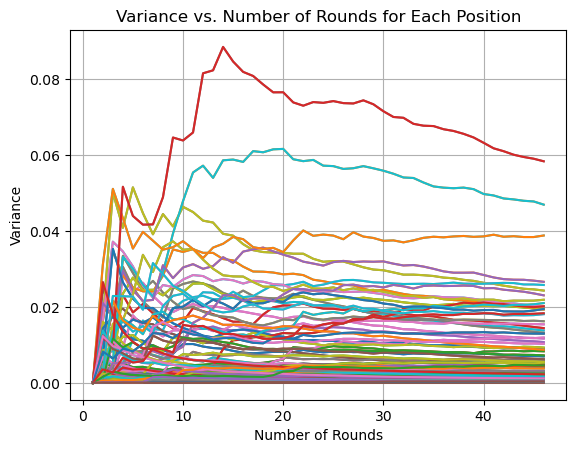

In [14]:

import numpy as np
import matplotlib.pyplot as plt# Initialize a list to store variances for each unit


# Initialize a list to store variances for each unit
final = np.empty((14, 14), dtype=object)

# Split the 'mean' matrix into 9 submatrices
submatrices = np.array_split(mean, 47)

# Calculate variances for each position in each unit and store them in the 'final' array
for i in range(47):
    for j in range(14):
        for k in range(14):
            unit_data = submatrices[:i]
            unit_variances = np.var([df.iloc[j, k] for df in unit_data])  # Calculate variance for each position
            if final[j, k] is None:
                final[j, k] = []  # Initialize a list if it doesn't exist
            final[j, k].append(unit_variances)  # Append the variance value



# Create a plot of the variances for each position in each unit

# Create a plot of the variances for each position (i, j) as 'k' increases from 2 to 11
for i in range(14):
    for j in range(14):
        plt.plot(range(47), final[i, j], label=f'({i}, {j})')

plt.xlabel('Number of Rounds')
plt.ylabel('Variance')
plt.title('Variance vs. Number of Rounds for Each Position')
plt.grid()
# plt.legend(fontsize='small', loc='upper right')  # Adjust the legend size and location
plt.show()

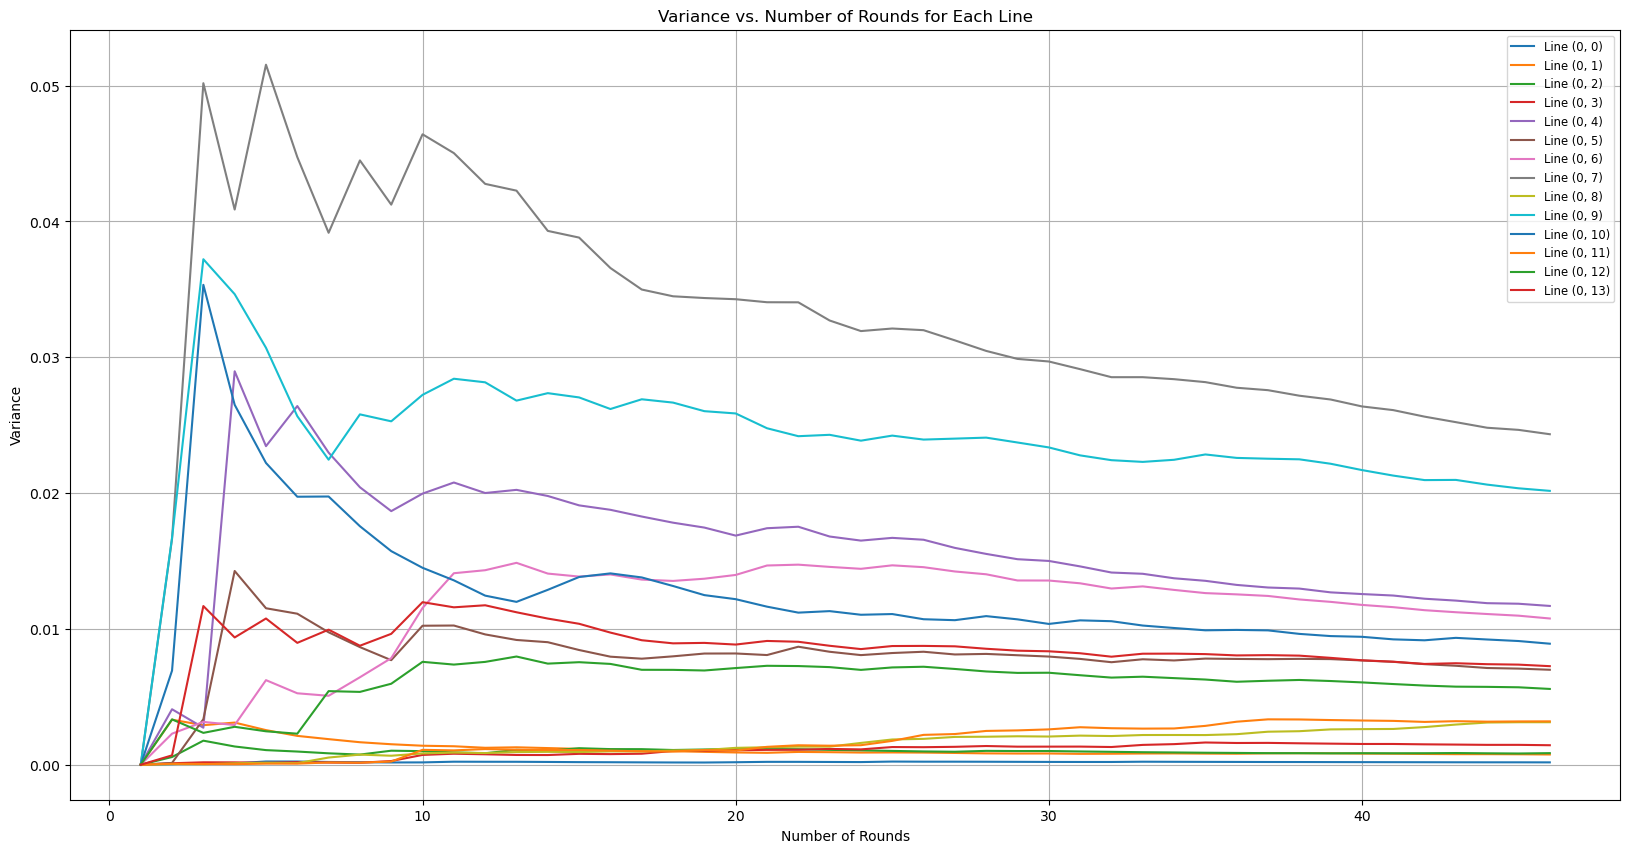

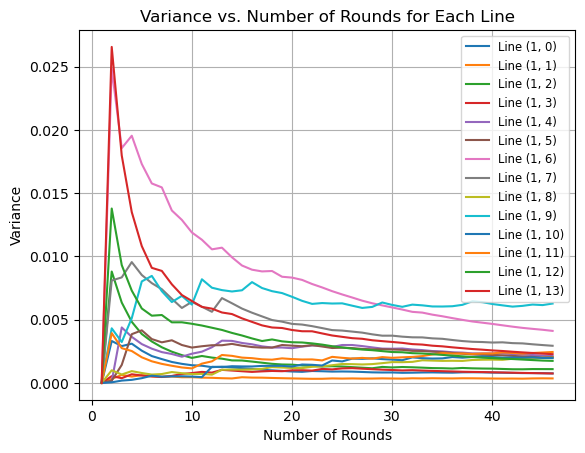

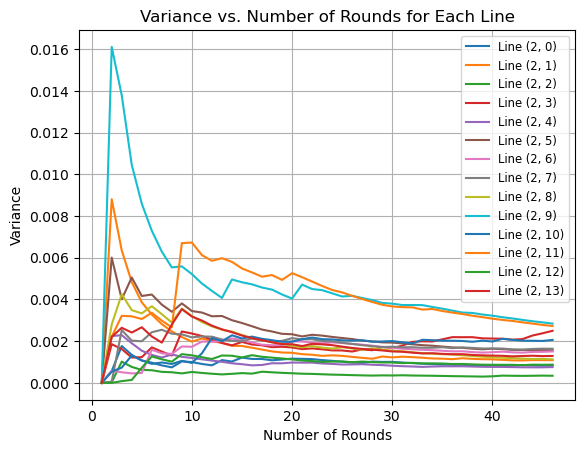

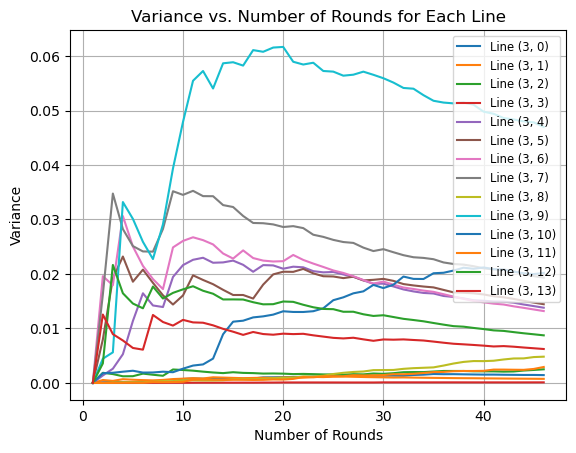

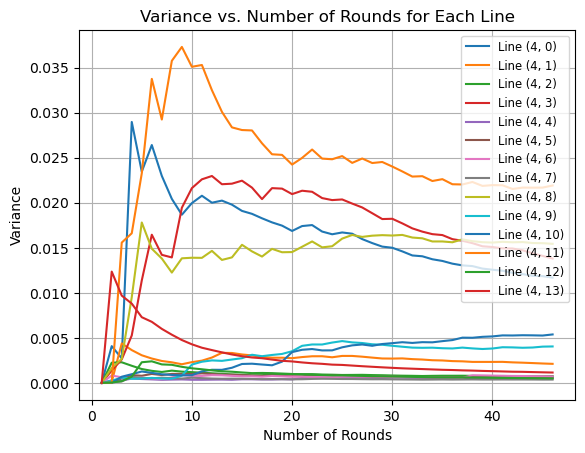

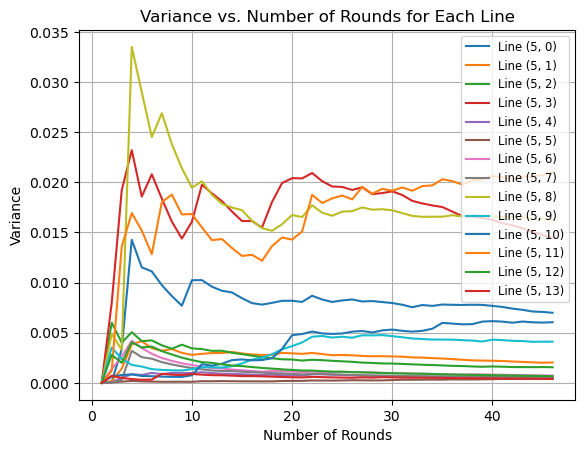

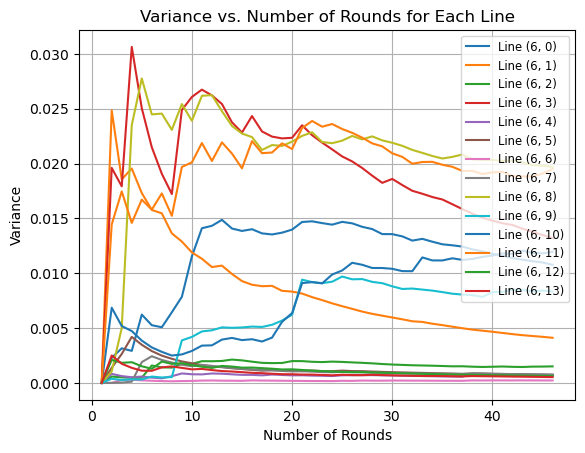

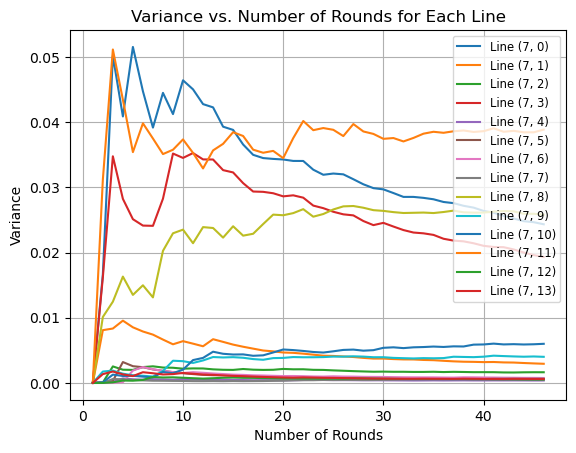

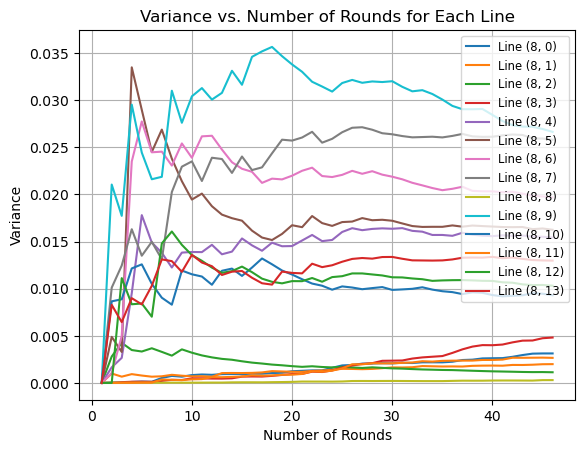

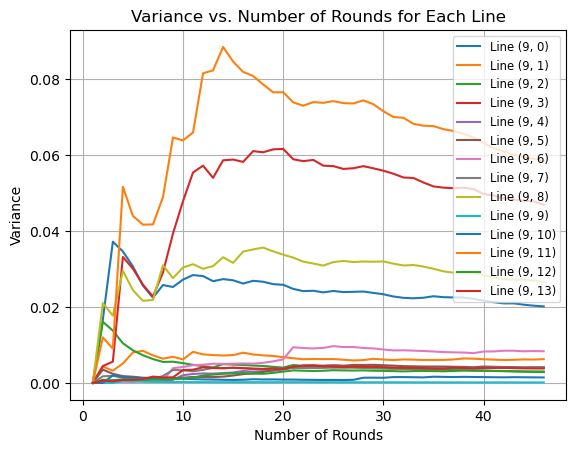

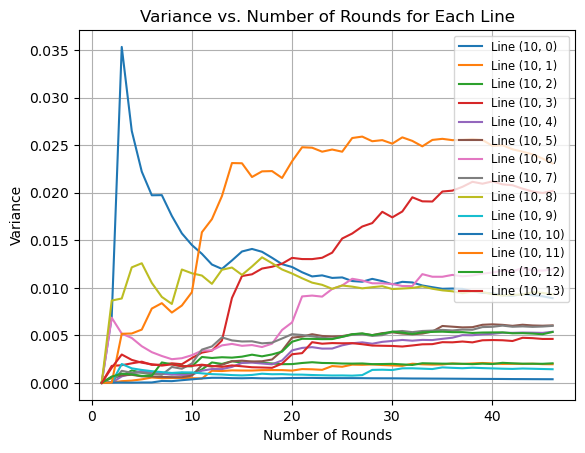

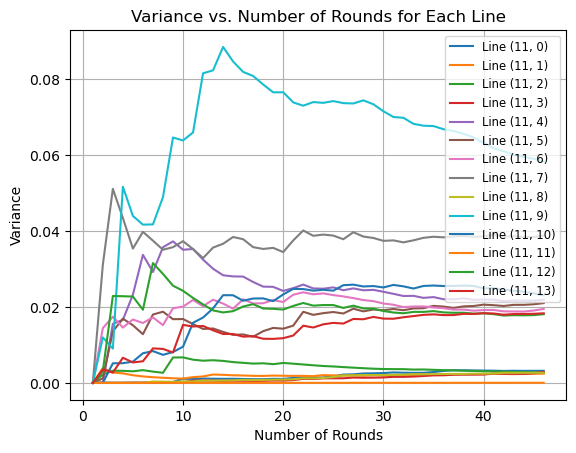

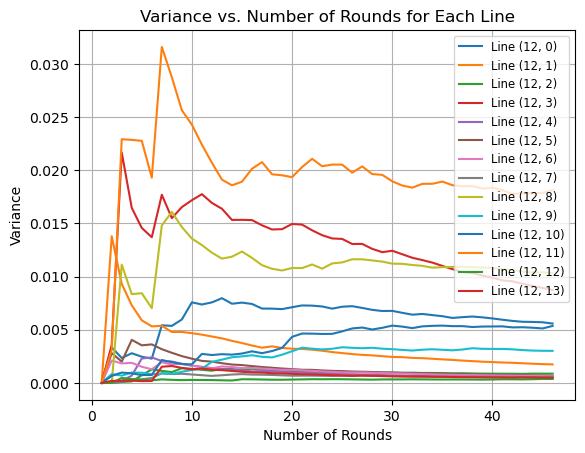

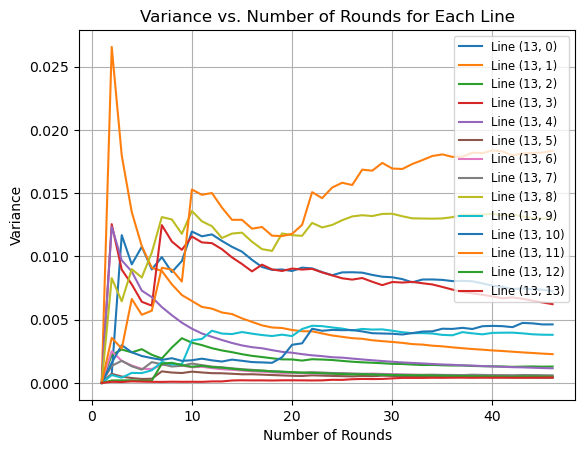

In [22]:
import matplotlib.pyplot as plt

# Set the size of the plot
plt.figure(figsize=(20, 10))

# Create a plot of the variances for each line as 'k' increases from 2 to 11
for i in range(14):
    for j in range(14):
        
        plt.plot(range(47), final[i, j], label=f'Line ({i}, {j})')

# Set the size of the plot
    plt.xlabel('Number of Rounds')
    plt.ylabel('Variance')
    plt.title('Variance vs. Number of Rounds for Each Line')
    plt.grid()
    plt.legend(fontsize='small', loc='upper right')  # Adjust the legend size and location
    plt.show()


/Users/yunbo-max/anaconda3/envs/Cambridge/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/yunbo-max/anaconda3/envs/Cambridge/lib/python3.10/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Users/yunbo-max/anaconda3/envs/Cambridge/lib/python3.10/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


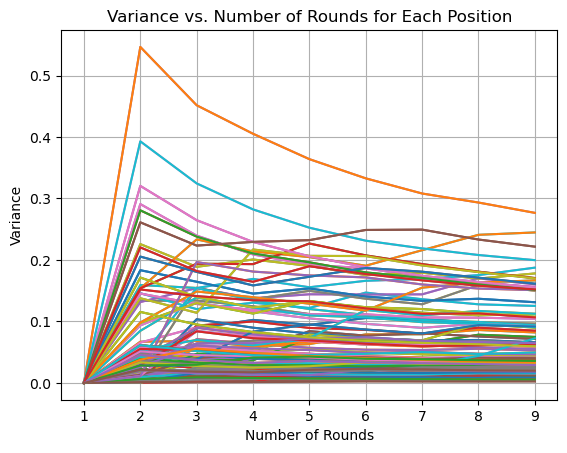

In [5]:

import numpy as np
import matplotlib.pyplot as plt# Initialize a list to store variances for each unit


# Initialize a list to store variances for each unit
final = np.empty((14, 14), dtype=object)

# Split the 'mean' matrix into 9 submatrices
submatrices = np.array_split(mean, 9)

# Calculate variances for each position in each unit and store them in the 'final' array
for i in range(10):
    for j in range(14):
        for k in range(14):
            unit_data = submatrices[:i]
            unit_variances = np.std([df.iloc[j, k] for df in unit_data])  # Calculate variance for each position
            if final[j, k] is None:
                final[j, k] = []  # Initialize a list if it doesn't exist
            final[j, k].append(unit_variances)  # Append the variance value



# Create a plot of the variances for each position in each unit

# Create a plot of the variances for each position (i, j) as 'k' increases from 2 to 11
for i in range(14):
    for j in range(14):
        plt.plot(range(10), final[i, j], label=f'({i}, {j})')

plt.xlabel('Number of Rounds')
plt.ylabel('Variance')
plt.title('Variance vs. Number of Rounds for Each Position')
plt.grid()
# plt.legend(fontsize='small', loc='upper right')  # Adjust the legend size and location
plt.show()

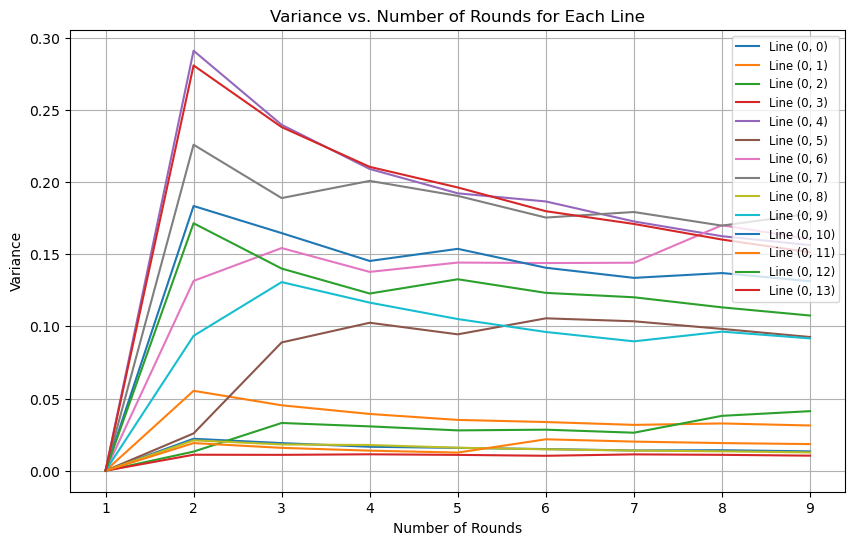

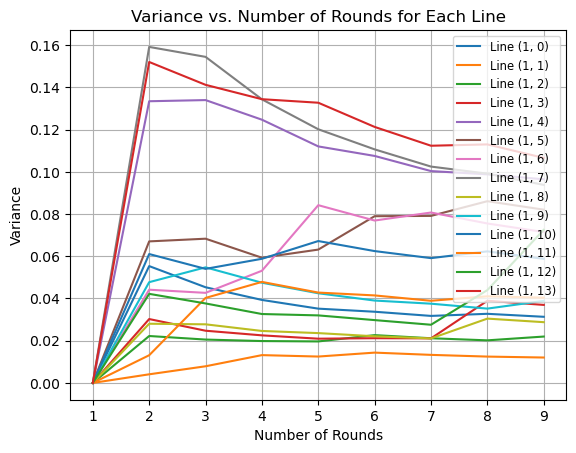

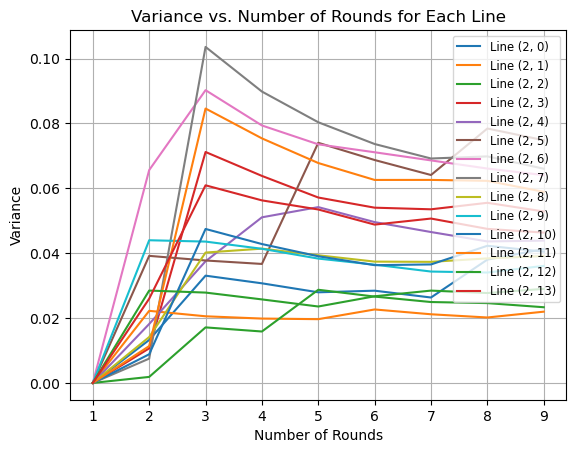

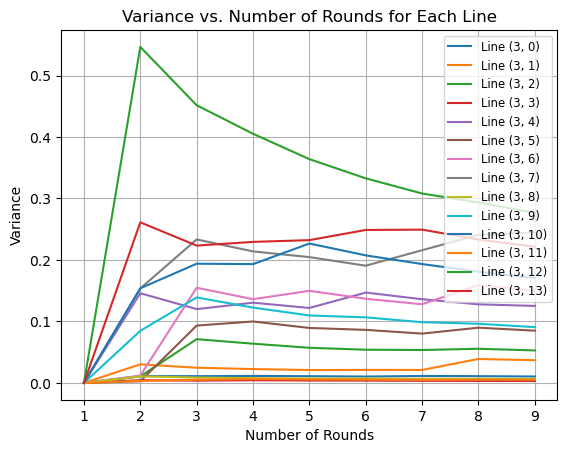

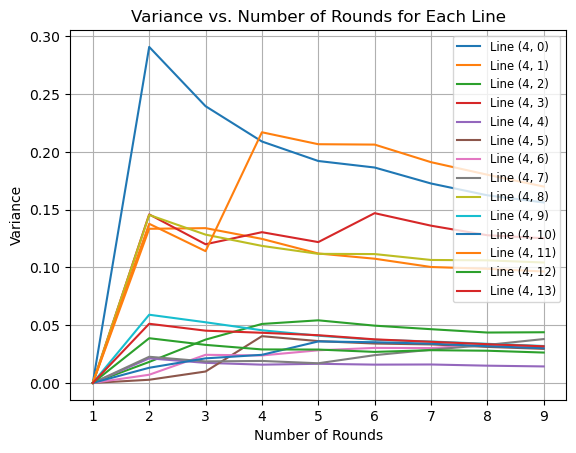

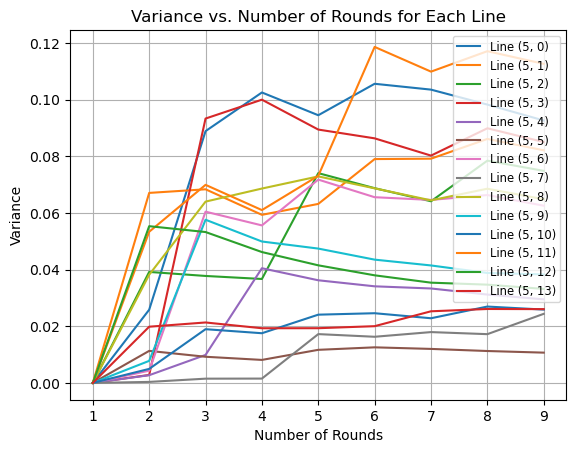

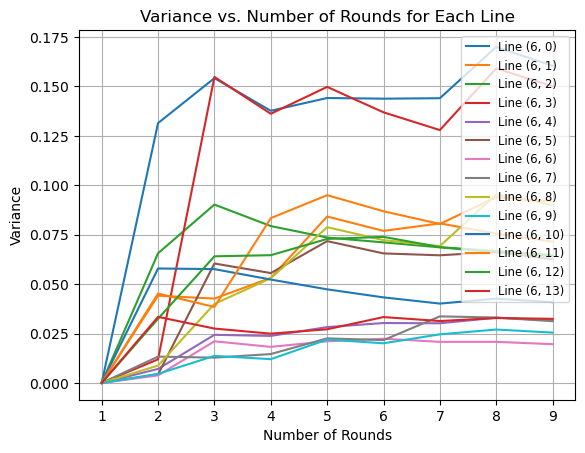

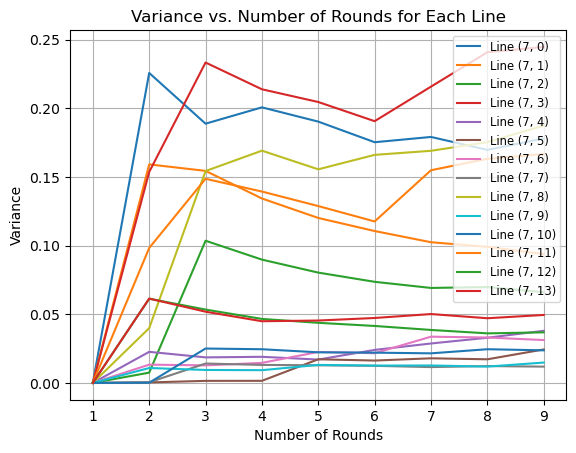

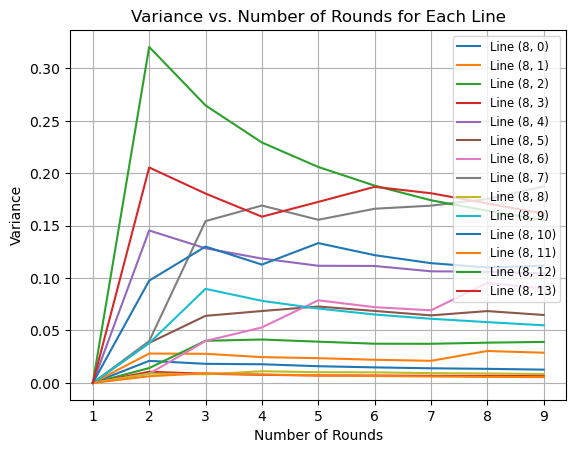

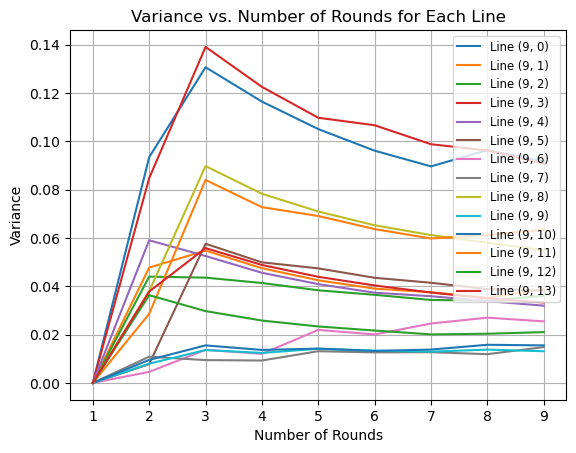

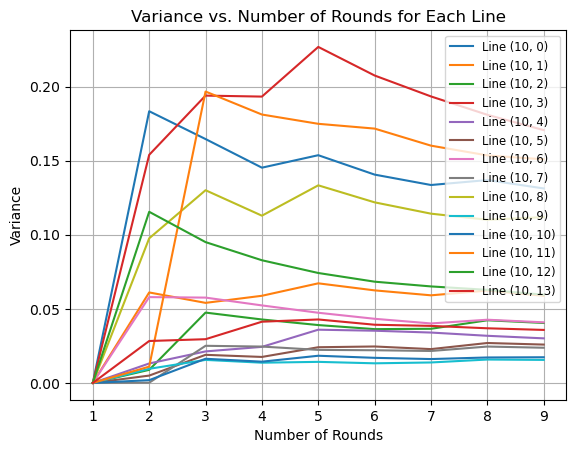

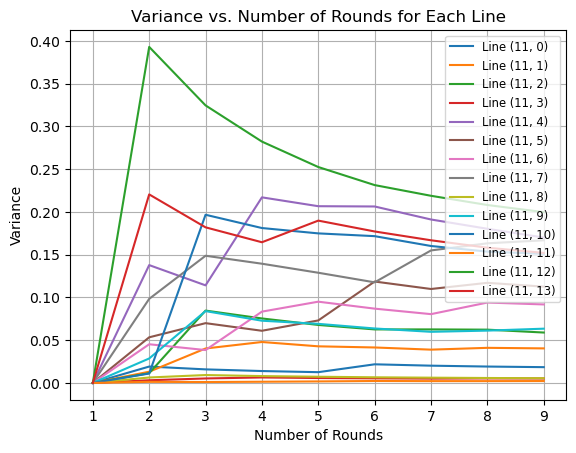

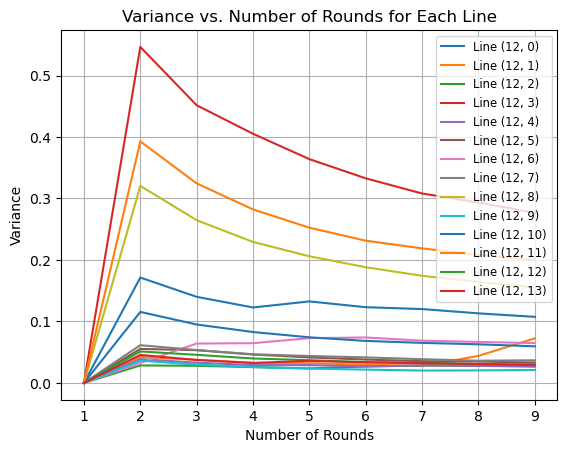

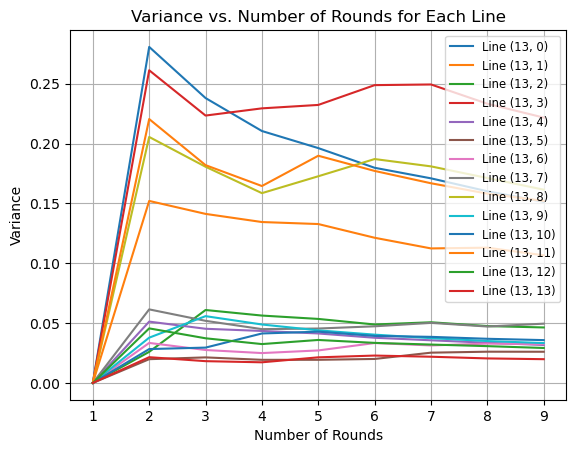

In [6]:
import matplotlib.pyplot as plt

# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create a plot of the variances for each line as 'k' increases from 2 to 11
for i in range(14):
    for j in range(14):
        plt.plot(range(10), final[i, j], label=f'Line ({i}, {j})')

    plt.xlabel('Number of Rounds')
    plt.ylabel('Variance')
    plt.title('Variance vs. Number of Rounds for Each Line')
    plt.grid()
    plt.legend(fontsize='small', loc='upper right')  # Adjust the legend size and location
    plt.show()


In [7]:
# Initialize a list to store the convergence percentages for each position
convergence_percentages = []

# Define a convergence threshold (e.g., 1% change)
convergence_threshold = 0.01

# Calculate convergence percentages for each position
for i in range(14):
    for j in range(14):
        position_variances = variances_array[:, i, j]
        convergence_count = np.sum(np.abs(np.diff(position_variances)) < convergence_threshold)
        total_counts = len(position_variances) - 1  # Subtract 1 for differences

        convergence_percentage = (convergence_count / total_counts) * 100
        convergence_percentages.append(convergence_percentage)

# Print the percentage of positions that have converged
print("Percentage of positions that have converged:")
for i in range(14):
    for j in range(14):
        position_index = i * 14 + j
        print(f"Position ({i}, {j}): {convergence_percentages[position_index]:.2f}%")

Percentage of positions that have converged:
Position (0, 0): 100.00%
Position (0, 1): 100.00%
Position (0, 2): 100.00%
Position (0, 3): 100.00%
Position (0, 4): 75.00%
Position (0, 5): 100.00%
Position (0, 6): 100.00%
Position (0, 7): 87.50%
Position (0, 8): 100.00%
Position (0, 9): 100.00%
Position (0, 10): 100.00%
Position (0, 11): 100.00%
Position (0, 12): 100.00%
Position (0, 13): 75.00%
Position (1, 0): 100.00%
Position (1, 1): 100.00%
Position (1, 2): 100.00%
Position (1, 3): 100.00%
Position (1, 4): 100.00%
Position (1, 5): 100.00%
Position (1, 6): 100.00%
Position (1, 7): 100.00%
Position (1, 8): 100.00%
Position (1, 9): 100.00%
Position (1, 10): 100.00%
Position (1, 11): 100.00%
Position (1, 12): 100.00%
Position (1, 13): 100.00%
Position (2, 0): 100.00%
Position (2, 1): 100.00%
Position (2, 2): 100.00%
Position (2, 3): 100.00%
Position (2, 4): 100.00%
Position (2, 5): 100.00%
Position (2, 6): 100.00%
Position (2, 7): 87.50%
Position (2, 8): 100.00%
Position (2, 9): 100.00%
P

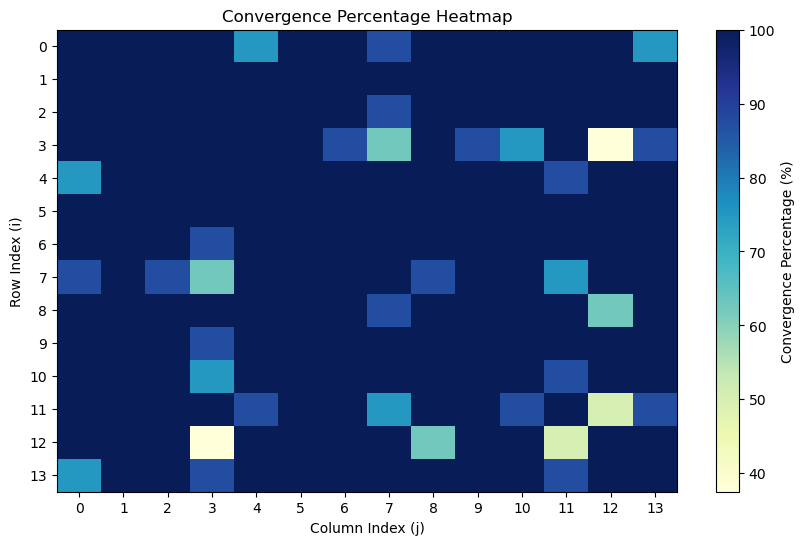

In [19]:
# Reshape the convergence_percentages to a 14x14 matrix
convergence_matrix = np.array(convergence_percentages).reshape(14, 14)

# Create a heatmap
plt.figure(figsize=(10, 6))
plt.imshow(convergence_matrix, cmap='YlGnBu', interpolation='nearest', aspect='auto')

# Add a colorbar
cbar = plt.colorbar()
cbar.set_label('Convergence Percentage (%)')

# Add labels to the axes
plt.xticks(range(14), range(14))
plt.yticks(range(14), range(14))
plt.xlabel('Column Index (j)')
plt.ylabel('Row Index (i)')

plt.title('Convergence Percentage Heatmap')
plt.show()

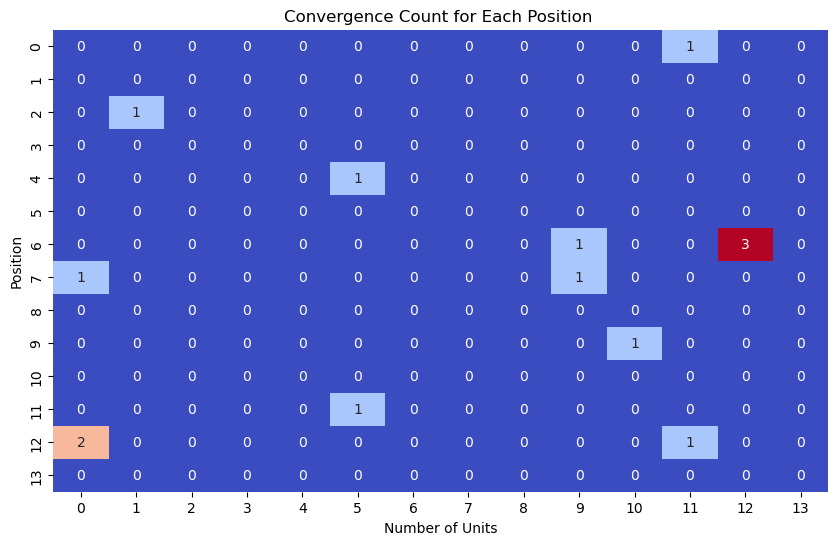

In [37]:
# Initialize a list to store variances for each position in each unit
variances = []

# Split the 'mean' matrix into 9 submatrices
submatrices = np.array_split(mean, 9)

# Calculate variances for each position in each unit and store them in the 'variances' list
for i in range(2, 11):
    unit_variances = np.var(submatrices[:i], axis=0)  # Calculate variance for each position
    variances.append(unit_variances)

# Convert the list of variances to a NumPy array
variances_array = np.array(variances)

# Calculate the percentage change in variance
percentage_change = np.zeros((14, 14))

# Define a threshold for convergence
convergence_threshold = 0.05
convergence_count_threshold = 3  # Converge after the threshold is crossed multiple times

# Create a list to store the convergence counts
convergence_counts = np.zeros((14, 14))

for i in range(14):
    for j in range(14):
        consecutive_count = 0
        for k in range(1, len(variances_array)):
            change = abs(variances_array[k, i, j] - variances_array[k - 1, i, j]) / variances_array[k - 1, i, j]
            if change < convergence_threshold:
                consecutive_count += 1
                if consecutive_count >= convergence_count_threshold:
                    convergence_counts[i, j] += 1
            else:
                consecutive_count = 0

# Create a heatmap to visualize convergence
plt.figure(figsize=(10, 6))
sns.heatmap(convergence_counts, cmap="coolwarm", annot=True, cbar=False)
plt.xlabel('Number of Units')
plt.ylabel('Position')
plt.title('Convergence Count for Each Position ')

plt.show()

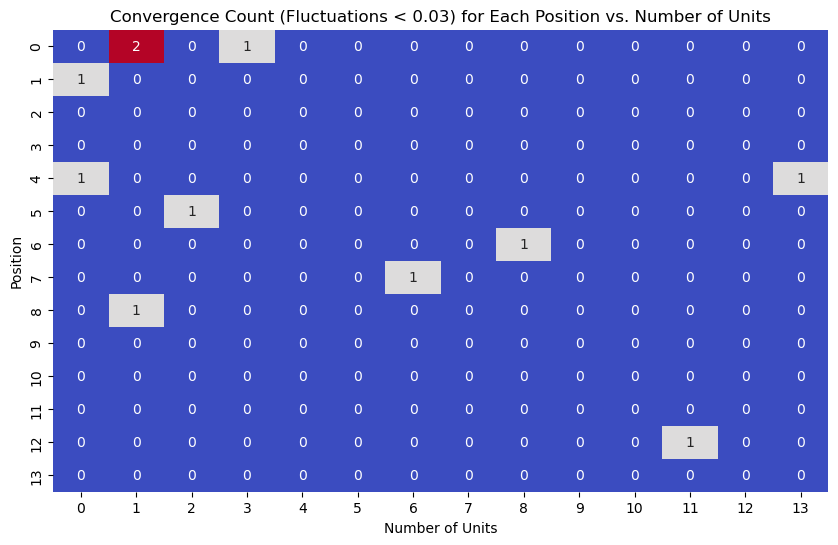

In [41]:
# Initialize a list to store variances for each position in each unit
variances = []

# Split the 'mean' matrix into 9 submatrices
submatrices = np.array_split(mean, 9)

# Calculate variances for each position in each unit and store them in the 'variances' list
for i in range(2, 11):
    unit_variances = np.var(submatrices[:i], axis=0)  # Calculate variance for each position
    variances.append(unit_variances)

# Convert the list of variances to a NumPy array
variances_array = np.array(variances)

# Calculate the cumulative percentage change in variance
cumulative_percentage_change = np.zeros((14, 14))

# Define a threshold for convergence
convergence_threshold = 0.01
tolerance = 0.03  # Tolerance for acceptable fluctuations

# Create a list to store the convergence counts
convergence_counts = np.zeros((14, 14))

for i in range(14):
    for j in range(14):
        cumulative_change = 0
        for k in range(1, len(variances_array)):
            change = abs(variances_array[k, i, j] - variances_array[k - 1, i, j]) / variances_array[k - 1, i, j]
            cumulative_change += change
            if cumulative_change < tolerance:
                convergence_counts[i, j] += 1

# Create a heatmap to visualize convergence
plt.figure(figsize=(10, 6))
sns.heatmap(convergence_counts, cmap="coolwarm", annot=True, cbar=False)
plt.xlabel('Number of Units')
plt.ylabel('Position')
plt.title(f'Convergence Count (Fluctuations < {tolerance}) for Each Position vs. Number of Units')

plt.show()

In [24]:
import h5py
import pandas as pd

# Open the HDF5 file
file = h5py.File(
    "/Users/yunbo-max/Desktop/Personalised_FL/market_data.h5",
    "r",
)
dataset = pd.DataFrame(file['0'][:])
print(dataset)

           0        1         2           3    4     5    6           7   \
0     77202.0  20755.0  180517.0  327.750000  2.0  73.0  2.0   91.250000   
1     75929.0  19482.0  179244.0  327.750000  2.0  73.0  1.0   45.689999   
2     75928.0  19481.0  179243.0  327.750000  2.0  73.0  1.0   21.760000   
3     75905.0  19458.0  179220.0  327.750000  2.0  73.0  1.0  152.600006   
4     75900.0  19453.0  179215.0  327.750000  2.0  73.0  1.0  143.160004   
...       ...      ...       ...         ...  ...   ...  ...         ...   
9534  26165.0   6024.0   65495.0  399.980011  7.0  45.0  1.0  133.839996   
9535  26130.0   5187.0   65409.0  399.980011  7.0  45.0  1.0  130.490005   
9536  26087.0   2642.0   65296.0  399.980011  7.0  45.0  1.0 -337.100006   
9537  26083.0   1238.0   65285.0  399.980011  7.0  45.0  1.0 -258.779999   
9538  26059.0   8247.0   65219.0  399.980011  7.0  45.0  1.0   50.110001   

          8     9   ...      17         18   19   20      21   22   23  \
0     1360.0 